# Module 1 - Manipulating data with Pandas
## Pandas Part 2

![austin](http://www.austintexas.gov/sites/default/files/aac_logo.jpg)

## Scenario:
You have decided that you want to start your own animal shelter, but you want to get an idea of what that will entail and get more information about planning. In this lecture, we are continue to look at a real data set collected by Austin Animal Center over several years and use our pandas skills from the last lecture and learn some new ones in order to explore this data further.

#### _Our goals today are to be able to_: <br/>

Use the pandas library to:

- Get summary info about a dataset and its variables
  - Apply and use info, describe and dtypes
  - Use mean, min, max, and value_counts 
- Use apply and applymap to transform columns and create new values

- Explain lambda functions and use them to use an apply on a DataFrame
- Explain what a groupby object is and split a DataFrame using a groupby
- Reshape a DataFrame using joins, merges, pivoting, stacking, and melting


### (From end of last week's lesson) Boolean Subsetting

In [1]:
import pandas as pd

In [2]:
student_dict = {
    'name': ['Samantha', 'Alex', 'Dante', 'Samantha'],
    'age': ['35', '17', '26', '21'],
    'city': ['Houston', 'Seattle', 'New york', 'Atlanta'],
    'state': ['Texas', 'Washington', 'New York', 'Georgia']
}

students_df = pd.DataFrame(student_dict)

In [8]:
# The statement data[‘name’] == ‘Samantha’] produces a Pandas Series with a True/False value for every row
# in the ‘data’ DataFrame, where there are “True” values for the rows where the name is “Samantha”.
# These type of boolean arrays can be passed directly to the .loc indexer.
students_df.loc[students_df['name'] == 'Samantha']

,age,city,name,state
0,35,Houston,Samantha,Texas
3,21,Atlanta,Samantha,Georgia


In [11]:
# What about if we only want the city and state of the selected students with the name Samantha?
students_df.loc[students_df['name'] == 'Samantha', ['city', 'state']]

,city,state
0,Houston,Texas
3,Atlanta,Georgia


In [5]:
# What amount if we want to select a student of a specific age?
students_df.loc[students_df['age'] == '21']

,age,city,name,state
3,21,Atlanta,Samantha,Georgia


In [9]:
# What amount if we want to select a student of a specific age?
students_df.loc[(students_df['age'] == '21') &
                (students_df['city'] == 'Atlanta')]

,age,city,name,state
3,21,Atlanta,Samantha,Georgia


In [15]:
# What should be returned?
students_df.loc[(students_df['age'] == '35') |
                (students_df['city'] == 'Atlanta')].iloc[0]

age            35
city      Houston
name     Samantha
state       Texas
Name: 0, dtype: object

## Getting started

Let's take a moment to examine the [Austin Animal Center data set](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238/data). What kinds of questions can we ask this data and what kinds of information can we get back?

In pairs and as a class, let's generate ideas.

## Switch gears

Before we answer those questions about the animal shelter data, let's practice on a simpler dataset.
Read about this dataset here: https://www.kaggle.com/ronitf/heart-disease-uci
![heart-data](images/heartbloodpres.jpeg)

The dataset is most often used to practice classification algorithms. Can one develop a model to predict the likelihood of heart disease based on other measurable characteristics? We will return to that specific question in a few weeks, but for now we wish to use the dataset to practice some pandas methods.

### 1. Get summary info about a dataset and its variables

Applying and using `info`, `describe`, `mean`, `min`, `max`, `apply`, and `applymap` from the Pandas library

The Pandas library has several useful tools built in. Let's explore some of them.

In [16]:
!pwd
!ls -lath

'pwd' is not recognized as an internal or external command,
operable program or batch file.
'ls' is not recognized as an internal or external command,
operable program or batch file.


In [17]:
import pandas as pd
import numpy as np

uci = pd.read_csv('data/heart.csv')

In [18]:
uci.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### The `.columns` and `.shape` Attributes

In [19]:
uci.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [25]:
uci.shape

(303, 14)

#### The `.info() `and `.describe()` and `.dtypes` methods

Pandas DataFrames have many useful methods! Let's look at `.info()` , `.describe()`, and `dtypes`.

In [20]:
# Call the .info() method on our dataset. What do you observe?
uci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [21]:
uci_new = uci.copy()
uci_new['str_col'] = 'B'

In [22]:
uci_new.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,str_col
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,B
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,B
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,B
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,B
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,B


In [23]:
# Call the .describe() method on our dataset. What do you observe?
uci_new.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [32]:
np.nan == np.nan

False

In [33]:
np.nan is np.nan

True

In [24]:
# Use the code below. How does the output differ from info() ?
uci_new.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
str_col      object
dtype: object

#### `.mean()`, .`min()`,` .max()`, `.sum()`

The methods `.mean()`, `.min()`, and `.max()` will perform just the way you think they will!

Note that these are methods both for Series and for DataFrames.

Also check out `.count()` and  `.isna()`.

In [42]:
pd.isnull(uci.ca).all()

False

In [45]:
pd.isnull(uci.ca).any()

False

In [47]:
uci.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

#### The Axis Variable

In [51]:
uci.sum(axis=0)  # Try [shift] + [tab] here!

age         16473.0
sex           207.0
cp            293.0
trestbps    39882.0
chol        74618.0
fbs            45.0
restecg       160.0
thalach     45343.0
exang          99.0
oldpeak       315.0
slope         424.0
ca            221.0
thal          701.0
target        165.0
dtype: float64

#### .`value_counts()`

For a DataFrame _Series_, the `.value_counts()` method will tell you how many of each value you've got.

In [52]:
uci.age.value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
64    10
41    10
63     9
67     9
55     8
45     8
42     8
53     8
61     8
65     8
43     8
66     7
50     7
48     7
46     7
49     5
47     5
39     4
35     4
68     4
70     4
40     3
71     3
69     3
38     3
34     2
37     2
77     1
76     1
74     1
29     1
Name: age, dtype: int64

Exercise: What are the different values for `restecg`?

In [53]:
# Your code here!
uci.restecg.value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

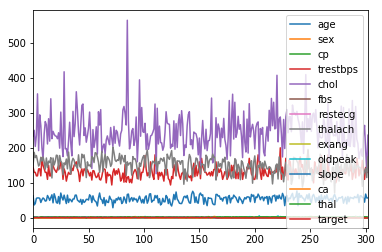

In [54]:
%matplotlib inline
uci.plot()

In [55]:
uci.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


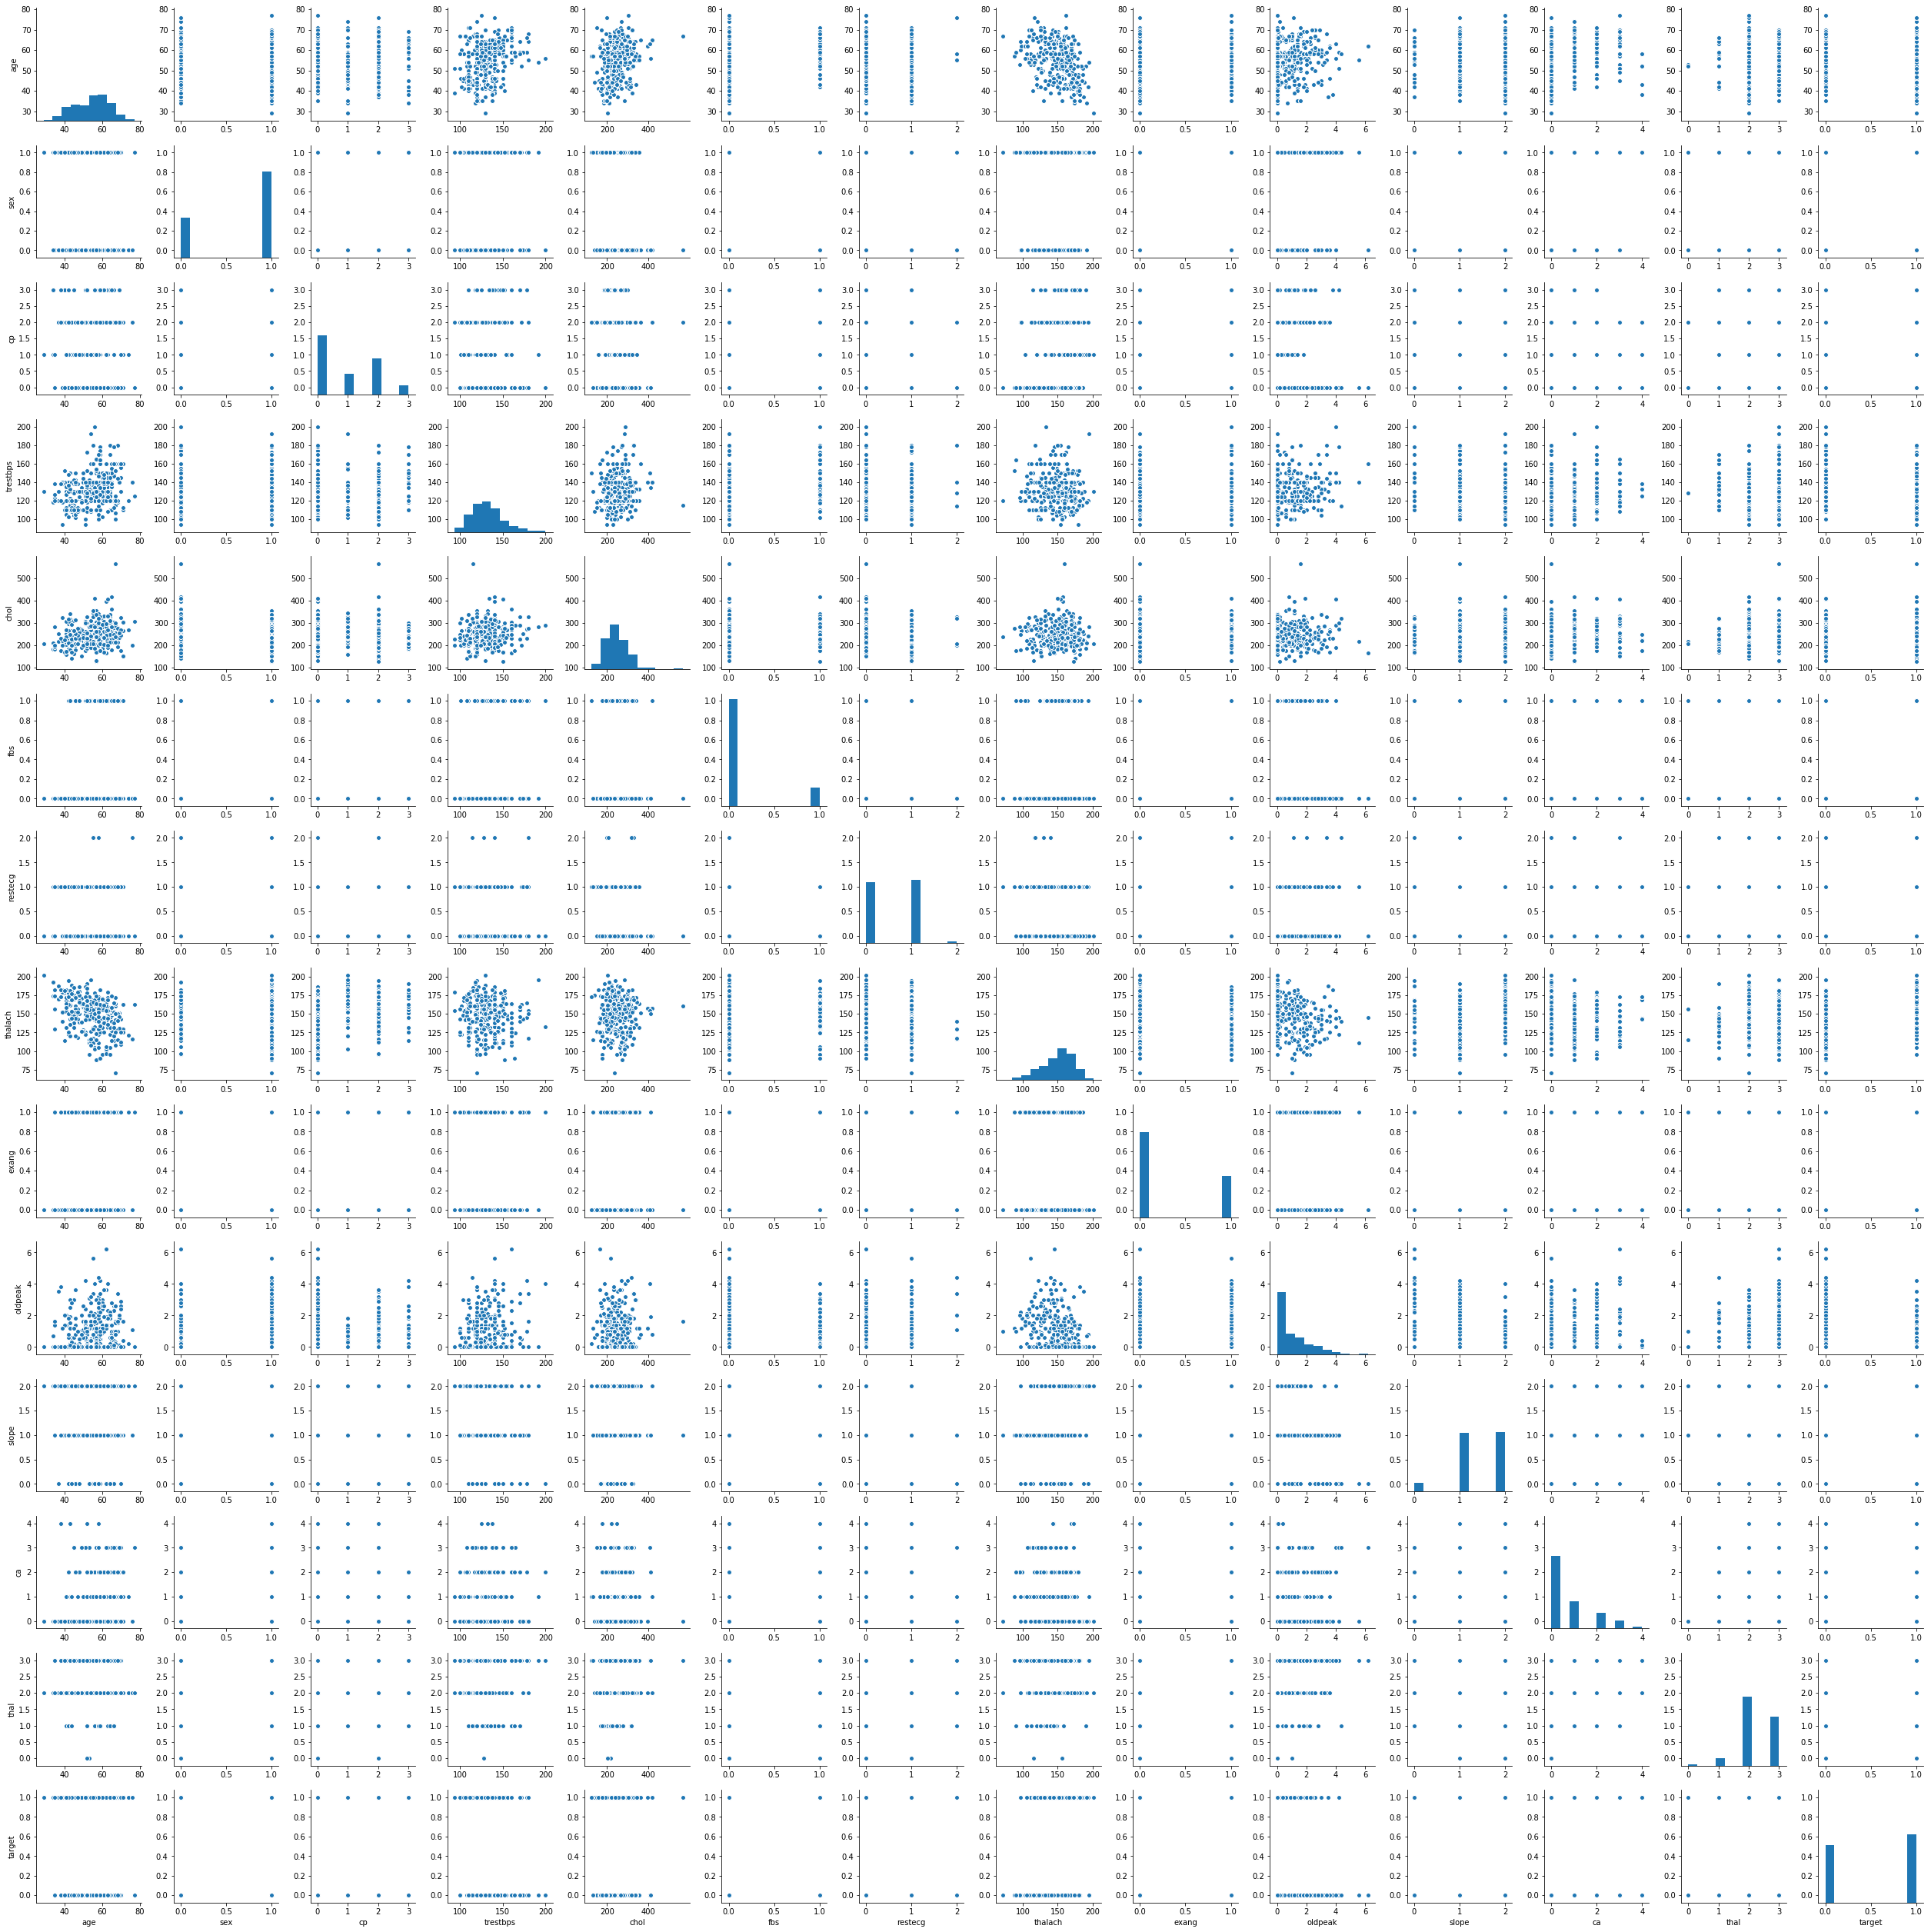

In [56]:
import seaborn as sns
sns.pairplot(uci)

### Apply to Animal Shelter Data
Using `.info()` and `.describe()` and `dtypes` what observations can we make about the data?

What are the breed value counts?

How about age counts for dogs?

In [2]:
animal_outcomes = pd.read_csv('https://data.austintexas.gov/api/views/9t4d-g238/rows.csv?accessType=DOWNLOAD')

In [4]:
# Dog_df = animal_outcomes.loc[animal_outcomes['Animal Type'] == 'Dog']
# Cat_df = animal_outcomes.loc[animal_outcomes['Animal Type'] == 'Cat']
# Other_df = animal_outcomes.loc[animal_outcomes['Animal Type'] == 'Other']
# Bird_df = animal_outcomes.loc[animal_outcomes['Animal Type'] == 'Bird']
# Livestock_df = animal_outcomes.loc[animal_outcomes['Animal Type'] == 'Livestock']

In [8]:
# Dog_df.to_excel("Austin_Dogs.xlsx" ,index = False)
# Cat_df.to_excel("Austin_Dogs.xlsx" ,index = False)
# Other_df.to_excel("Austin_Dogs.xlsx" ,index = False)
# Bird_df.to_excel("Austin_Dogs.xlsx" ,index = False)
# Livestock_df.to_excel("Austin_Dogs.xlsx" ,index = False)

In [58]:
animal_outcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107099 entries, 0 to 107098
Data columns (total 12 columns):
Animal ID           107099 non-null object
Name                73433 non-null object
DateTime            107099 non-null object
MonthYear           107099 non-null object
Date of Birth       107099 non-null object
Outcome Type        107092 non-null object
Outcome Subtype     48798 non-null object
Animal Type         107099 non-null object
Sex upon Outcome    107095 non-null object
Age upon Outcome    107080 non-null object
Breed               107099 non-null object
Color               107099 non-null object
dtypes: object(12)
memory usage: 9.8+ MB


In [59]:
animal_outcomes.dtypes

Animal ID           object
Name                object
DateTime            object
MonthYear           object
Date of Birth       object
Outcome Type        object
Outcome Subtype     object
Animal Type         object
Sex upon Outcome    object
Age upon Outcome    object
Breed               object
Color               object
dtype: object

In [61]:
animal_outcomes.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A791820,Bandit,09/03/2019 08:00:00 AM,09/03/2019 08:00:00 AM,04/01/2011,Euthanasia,At Vet,Dog,NaN,NaN,Pit Bull/Labrador Retriever,Brown Brindle/White
1,A794029,Isla,09/03/2019 06:57:00 AM,09/03/2019 06:57:00 AM,05/03/2018,Adoption,Foster,Dog,Spayed Female,1 year,Australian Kelpie Mix,Black/White
2,A803458,Loki,09/02/2019 09:55:00 PM,09/02/2019 09:55:00 PM,04/01/2019,Euthanasia,Suffering,Dog,Intact Male,5 months,Pit Bull Mix,Tan
3,A803490,Zeus,09/02/2019 06:34:00 PM,09/02/2019 06:34:00 PM,09/02/2015,Return to Owner,NaN,Dog,Neutered Male,4 years,Treeing Tennesse Brindle,Brown Brindle
4,A803551,Penelope,09/02/2019 06:31:00 PM,09/02/2019 06:31:00 PM,09/02/2013,Return to Owner,NaN,Dog,Spayed Female,6 years,Dachshund/Australian Cattle Dog,White/Brown


What are the breed `value_counts`?
What's the top breed for adopted dogs?

How about outcome counts for dogs?




In [62]:
# What are the breed value_counts?
animal_outcomes.Breed.value_counts()

Domestic Shorthair Mix                                  30156
Pit Bull Mix                                             8026
Labrador Retriever Mix                                   6264
Chihuahua Shorthair Mix                                  6013
Domestic Medium Hair Mix                                 3025
German Shepherd Mix                                      2716
Domestic Shorthair                                       2551
Bat Mix                                                  1741
Domestic Longhair Mix                                    1492
Australian Cattle Dog Mix                                1366
Siamese Mix                                              1218
Bat                                                      1027
Dachshund Mix                                             977
Boxer Mix                                                 893
Border Collie Mix                                         867
Miniature Poodle Mix                                      802
Catahoul

In [69]:
# What's the top breed for adopted dogs?
animal_outcomes.loc[(animal_outcomes['Animal Type'] == 'Dog') & (animal_outcomes['Outcome Type'] == 'Adoption')]\
               .Breed.value_counts().head()

Labrador Retriever Mix       3181
Pit Bull Mix                 3119
Chihuahua Shorthair Mix      2879
German Shepherd Mix          1372
Australian Cattle Dog Mix     768
Name: Breed, dtype: int64

In [70]:
# line break options
(animal_outcomes.loc[(animal_outcomes['Animal Type'] == 'Dog') & (animal_outcomes['Outcome Type'] == 'Adoption')]
                .Breed.value_counts().head())

Labrador Retriever Mix       3181
Pit Bull Mix                 3119
Chihuahua Shorthair Mix      2879
German Shepherd Mix          1372
Australian Cattle Dog Mix     768
Name: Breed, dtype: int64

In [68]:
# How about outcome counts for dogs?
animal_outcomes.loc[animal_outcomes['Animal Type'] == 'Dog', 'Outcome Type'].value_counts()

Adoption           28236
Return to Owner    17131
Transfer           13132
Euthanasia          1661
Rto-Adopt            373
Died                 219
Missing               27
Disposal              17
Name: Outcome Type, dtype: int64

### 2.  Changing data

#### DataFrame.applymap() and Series.map()

The ```.applymap()``` method takes a function as input that it will then apply to every entry in the dataframe.

In [ ]:
def successor(x):
    return x + 1

In [ ]:
uci.applymap(successor).head()

The `.map()` method takes a function as input that it will then apply to every entry in the Series.

In [ ]:
uci['age'].map(successor).tail(10)

#### Anonymous Functions (Lambda Abstraction)

Simple functions can be defined right in the function call. This is called 'lambda abstraction'; the function thus defined has no name and hence is "anonymous".

In [ ]:
uci['oldpeak'].map(lambda x: round(x))[:4]

Exercise: Use an anonymous function to turn the entries in age to strings

In [ ]:
# Your code here


### Apply to Animal Shelter Data

Use an `apply` to change the dates from strings to datetime objects. Similarly, use an apply to change the ages of the animals from strings to floats.

In [ ]:
# Your code here


## 3. Methods for Re-Organizing DataFrames
#### `.groupby()`

Those of you familiar with SQL have probably used the GROUP BY command. Pandas has this, too.

The `.groupby()` method is especially useful for aggregate functions applied to the data grouped in particular ways.

In [ ]:
uci.groupby('sex')

#### `.groups` and `.get_group()`

In [ ]:
uci.groupby('sex').groups

In [ ]:
uci.groupby('sex').get_group(0)  # .tail()

### Aggregating

In [ ]:
uci.groupby('sex').std()

Exercise: Tell me the average cholesterol level for those with heart disease.

In [ ]:
# Your code here!


### Apply to Animal Shelter Data

#### Task 1
- Use a groupby to show the average age of the different kinds of animal types.
- What about by animal types **and** gender?
 

In [ ]:
# Your code here


#### Task 2:
- Create new columns `year` and `month` by using a lambda function x.year on date
- Use `groupby` and `.size()` to tell me how many animals are adopted by month

In [ ]:
# Your code here


## 4. Reshaping a DataFrame

### `.pivot()`

Those of you familiar with Excel have probably used Pivot Tables. Pandas has a similar functionality.

In [ ]:
uci.pivot(values='sex', columns='target').head()

### Methods for Combining DataFrames: `.join()`, `.merge()`, `.concat()`, `.melt()`

### `.join()`

In [ ]:
toy1 = pd.DataFrame([[63, 142], [33, 47]], columns=['age', 'HP'])
toy2 = pd.DataFrame([[63, 100], [33, 200]], columns=['age', 'HP'])

In [ ]:
toy1.join(toy2.set_index('age'),
          on='age',
          lsuffix='_A',
          rsuffix='_B').head()

### `.merge()`

In [ ]:
ds_chars = pd.read_csv('data/ds_chars.csv', index_col=0)

In [ ]:
states = pd.read_csv('data/states.csv', index_col=0)

In [ ]:
ds_chars.merge(states,
               left_on='home_state',
               right_on='state',
               how='inner')

### `pd.concat()`

Exercise: Look up the documentation on pd.concat (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) and use it to concatenate ds_chars and states.
<br/>
Your result should still have only five rows!

In [ ]:
pd.concat([ds_chars, states], sort=False)

### `pd.melt()`

Melting removes the structure from your DataFrame and puts the data in a 'variable' and 'value' format.

In [ ]:
ds_chars.head()

In [ ]:
pd.melt(ds_chars,
        id_vars=['name'],
        value_vars=['HP', 'home_state'])

## Bringing it all together with the Animal Shelter Data

Join the data from the [Austin Animal Shelter Intake dataset](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Intakes/wter-evkm) to the outcomes dataset by Animal ID.

Use the dates from each dataset to see how long animals spend in the shelter. Does it differ by time of year? By outcome?

The Url for the Intake Dataset is here: https://data.austintexas.gov/api/views/wter-evkm/rows.csv?accessType=DOWNLOAD

_Hints_ :
- import and clean the intake dataset first
- use apply/applymap/lambda to change the variables to their proper format in the intake data
- rename the columns in the intake dataset *before* joining
- create a new days-in-shelter variable
- Notice that some values in "days_in_shelter" column are NaN or values < 0 (remove these rows using the "<" operator and ~is.na())
- Use group_by to get some interesting information about the dataset

Make sure to export and save your cleaned dataset. We will use it in a later lecture!

use the notation `df.to_csv()` to write the `df` to a csv. Read more about the `to_csv()` documentation [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html)

In [ ]:
#code here